# COS-Holes CIV and Literature Data Radial Profiles 

Basing code off of https://github.com/Deech08/HST_MagellanicCorona/blob/main/Figure_2.ipynb

From Krishnarao et al. 2022 (https://www.nature.com/articles/s41586-022-05090-5#Sec2) and advice from Bordoloi and at AAS 241, going to see if I can make radial profiles for my small data set as well as confidence intervals 

--------------------------

Info for packages: 
- pymccorrelation: https://github.com/privong/pymccorrelation 
- linmix: https://linmix.readthedocs.io/en/latest/install.html#installing
    - https://github.com/jmeyers314/linmix

In [1]:
#These are straight from Krishnarao + 2022 

import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy.table import QTable
#%matplotlib notebook

import seaborn as sns
pal = sns.color_palette("pastel")

import pickle

from pymccorrelation import pymccorrelation
import linmix

from scipy.stats import kendalltau
from seaborn.algorithms import bootstrap

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#From my previous list of things
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList
import glob

#plotting things 
#%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 35

# update various fontsizes to match
params = {'figure.figsize': (20, 14),
          'legend.fontsize': 13,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 10,
          'xtick.minor.size': 6,
          'ytick.major.size': 10,
          'ytick.minor.size': 6}
plt.rcParams.update(params)

#### CIV COS-Holes Data and CIV Simulations

In [2]:
#Bring in all the COS-Holes fit data
all_vp_df_J1101 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1101/all_vp.csv')
all_vp_df_J1159 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1159/all_vp.csv')
all_vp_df_J1222 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1222/all_vp.csv')
all_vp_df_J1249 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1249/all_vp.csv')
all_vp_df_J1051 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1051/all_vp.csv')
all_vp_df_J1123 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1123/all_vp.csv')
all_vp_df_J0246 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J0246/all_vp.csv')
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235/all_vp.csv')

In [3]:
#We care about the absorption features that we see around the galaxy so need to input the correct info for each one 
#Used some galaxy criterion to only see the lines that fit what I want to plot 

gal_df_J1101 = all_vp_df_J1101.loc[(all_vp_df_J1101['trans']=='C IV')]

#J1101 Values to make new pd df
trans_J1101 = np.array(gal_df_J1101['trans'])
zsys_J1101 = np.array(gal_df_J1101['zsys'])
N_J1101 = np.array(gal_df_J1101['col'])
sigN_J1101 = np.array(gal_df_J1101['sigcol'])
b_J1101 = np.array(gal_df_J1101['bval'])
sigb_J1101 = np.array(gal_df_J1101['sigbval'])
vel_J1101 = np.array(gal_df_J1101['vel'])
sigvel_J1101 = np.array(gal_df_J1101['sigvel'])
wav_J1101 = np.array(gal_df_J1101['restwave'])

#smaller df 
civ_df_J1101= pd.DataFrame({"Line":trans_J1101, "Wavelength":wav_J1101, "zsys":zsys_J1101, "N":N_J1101, "sigN":sigN_J1101, 
                   "b":b_J1101, "sigb":sigb_J1101, "vel":vel_J1101, "sigvel":sigvel_J1101})
#civ_df_J1101

gal_df_J1159 = all_vp_df_J1159.loc[(all_vp_df_J1159['trans']=='C IV')]

#J1159 Values 
trans_J1159 = np.array(gal_df_J1159['trans'])
zsys_J1159 = np.array(gal_df_J1159['zsys'])
N_J1159 = np.array(gal_df_J1159['col'])
sigN_J1159 = np.array(gal_df_J1159['sigcol'])
b_J1159 = np.array(gal_df_J1159['bval'])
sigb_J1159 = np.array(gal_df_J1159['sigbval'])
vel_J1159 = np.array(gal_df_J1159['vel'])
sigvel_J1159 = np.array(gal_df_J1159['sigvel'])
wav_J1159 = np.array(gal_df_J1159['restwave'])

#smaller df 
civ_df_J1159= pd.DataFrame({"Line":trans_J1159, "Wavelength":wav_J1159, "zsys":zsys_J1159, "N":N_J1159, "sigN":sigN_J1159, 
                   "b":b_J1159, "sigb":sigb_J1159, "vel":vel_J1159, "sigvel":sigvel_J1159})

gal_df_J1222 = all_vp_df_J1222.loc[(all_vp_df_J1222['trans']=='C IV')] 

#J1222 Values 
trans_J1222 = np.array(gal_df_J1222['trans'])
zsys_J1222 = np.array(gal_df_J1222['zsys'])
N_J1222 = np.array(gal_df_J1222['col'])
sigN_J1222 = np.array(gal_df_J1222['sigcol'])
b_J1222 = np.array(gal_df_J1222['bval'])
sigb_J1222 = np.array(gal_df_J1222['sigbval'])
vel_J1222 = np.array(gal_df_J1222['vel'])
sigvel_J1222 = np.array(gal_df_J1222['sigvel'])
wav_J1222 = np.array(gal_df_J1222['restwave'])

#smaller df  
civ_df_J1222= pd.DataFrame({"Line":trans_J1222, "Wavelength":wav_J1222, "zsys":zsys_J1222, "N":N_J1222, "sigN":sigN_J1222, 
                   "b":b_J1222, "sigb":sigb_J1222, "vel":vel_J1222, "sigvel":sigvel_J1222})

gal_df_J1249 = all_vp_df_J1249.loc[(all_vp_df_J1249['trans']=='C IV')]

#J1249 Values 
trans_J1249 = np.array(gal_df_J1249['trans'])
zsys_J1249 = np.array(gal_df_J1249['zsys'])
N_J1249 = np.array(gal_df_J1249['col'])
sigN_J1249 = np.array(gal_df_J1249['sigcol'])
b_J1249 = np.array(gal_df_J1249['bval'])
sigb_J1249 = np.array(gal_df_J1249['sigbval'])
vel_J1249 = np.array(gal_df_J1249['vel'])
sigvel_J1249 = np.array(gal_df_J1249['vel'])
wav_J1249 = np.array(gal_df_J1249['restwave'])

#smaller df 
civ_df_J1249= pd.DataFrame({"Line":trans_J1249, "Wavelength":wav_J1249, "zsys":zsys_J1249, "N":N_J1249, "sigN":sigN_J1249, 
                   "b":b_J1249, "sigb":sigb_J1249, "vel":vel_J1249, "sigvel":sigvel_J1249})

gal_df_J1051 = all_vp_df_J1051.loc[(all_vp_df_J1051['trans']=='C IV')] 

#J1051 Values 
trans_J1051 = np.array(gal_df_J1051['trans'])
zsys_J1051 = np.array(gal_df_J1051['zsys'])
N_J1051 = np.array(gal_df_J1051['col'])
sigN_J1051 = np.array(gal_df_J1051['sigcol'])
b_J1051 = np.array(gal_df_J1051['bval'])
sigb_J1051 = np.array(gal_df_J1051['sigbval'])
vel_J1051 = np.array(gal_df_J1051['vel'])
sigvel_J1051 = np.array(gal_df_J1051['sigvel'])
wav_J1051 = np.array(gal_df_J1051['restwave'])

#smaller df 
civ_df_J1051= pd.DataFrame({"Line":trans_J1051, "Wavelength":wav_J1051, "zsys":zsys_J1051, "N":N_J1051, "sigN":sigN_J1051, 
                   "b":b_J1051, "sigb":sigb_J1051, "vel":vel_J1051, "sigvel":sigvel_J1051})

gal_df_J1123 = all_vp_df_J1123.loc[(all_vp_df_J1123['trans']=='C IV')]

#J1123 Values 
trans_J1123 = np.array(gal_df_J1123['trans'])
zsys_J1123 = np.array(gal_df_J1123['zsys'])
N_J1123 = np.array(gal_df_J1123['col'])
sigN_J1123 = np.array(gal_df_J1123['sigcol'])
b_J1123 = np.array(gal_df_J1123['bval'])
sigb_J1123 = np.array(gal_df_J1123['sigbval'])
vel_J1123 = np.array(gal_df_J1123['vel'])
sigvel_J1123 = np.array(gal_df_J1123['sigvel'])
wav_J1123 = np.array(gal_df_J1123['restwave'])

#smaller df 
civ_df_J1123= pd.DataFrame({"Line":trans_J1123, "Wavelength":wav_J1123, "zsys":zsys_J1123, "N":N_J1123, "sigN":sigN_J1123, 
                   "b":b_J1123, "sigb":sigb_J1123, "vel":vel_J1123, "sigvel":sigvel_J1123})

gal_df_J0246 = all_vp_df_J0246.loc[(all_vp_df_J0246['trans']=='C IV')] 

#J0246 Values 
trans_J0246= np.array(gal_df_J0246['trans'])
zsys_J0246 = np.array(gal_df_J0246['zsys'])
N_J0246 = np.array(gal_df_J0246['col'])
sigN_J0246 = np.array(gal_df_J0246['sigcol'])
b_J0246 = np.array(gal_df_J0246['bval'])
sigb_J0246 = np.array(gal_df_J0246['sigbval'])
vel_J0246 = np.array(gal_df_J0246['vel'])
sigvel_J0246 = np.array(gal_df_J0246['sigvel'])
wav_J0246 = np.array(gal_df_J0246['restwave'])

#smaller df 
civ_df_J0246= pd.DataFrame({"Line":trans_J0246, "Wavelength":wav_J0246, "zsys":zsys_J0246, "N":N_J0246, "sigN":sigN_J0246, 
                   "b":b_J0246, "sigb":sigb_J0246, "vel":vel_J0246, "sigvel":sigvel_J0246})

gal_df_J1235 = all_vp_df_J1235.loc[(all_vp_df_J1235['trans']=='C IV')]

#J1235 Values 
trans_J1235= np.array(gal_df_J1235['trans'])
zsys_J1235 = np.array(gal_df_J1235['zsys'])
N_J1235 = np.array(gal_df_J1235['col'])
sigN_J1235 = np.array(gal_df_J1235['sigcol'])
b_J1235 = np.array(gal_df_J1235['bval'])
sigb_J1235 = np.array(gal_df_J1235['sigbval'])
vel_J1235 = np.array(gal_df_J1235['vel'])
sigvel_J1235 = np.array(gal_df_J1235['sigvel'])
wav_J1235 = np.array(gal_df_J1235['restwave'])

#smaller df - REMEMBER THIS IS A NON DETECTION
civ_df_J1235= pd.DataFrame({"Line":trans_J1235, "Wavelength":wav_J1235, "zsys":zsys_J1235, "N":N_J1235, "sigN":sigN_J1235, 
                   "b":b_J1235, "sigb":sigb_J1235, "vel":vel_J1235, "sigvel":sigvel_J1235})

In [4]:
#Known Galaxy Information

gal_param_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/gal_param.csv')

#getting them out of the table 
gal = np.array(gal_param_df['galaxy'])
s_mass = np.array(gal_param_df['stellar mass'])
bh_mass = np.array(gal_param_df['BH mass'])
rvir = np.array(gal_param_df['Rvir'])
rproj = np.array(gal_param_df['Rproj'])

gal_param_df

,galaxy,stellar mass,BH mass,halo mass,Rvir,Rproj,angle
0,NGC3489,10.20,6.770,11.782755,273.43553,110.019140,331.268580
1,NGC4026,10.43,8.255,11.964435,314.35077,37.385240,22.685004
2,NGC4258,10.88,7.577,12.522479,482.42196,69.778997,208.535150
3,NGC4258,10.88,7.577,12.522479,482.42196,130.305660,206.816170
4,NGC4736,10.62,6.830,12.154667,363.76792,25.520224,41.789694
5,NGC3414,10.79,8.400,12.377581,431.64653,40.499140,0.885271
6,NGC3627,10.84,6.920,12.455645,458.29968,119.976000,267.760040
7,NGC1097,10.50,8.140,12.029020,330.32571,55.657239,322.869730
8,NGC4564,10.40,7.940,11.938382,308.12739,123.078500,224.489670


In [5]:
#Nicole Data (CHaNGA Models)

R25_HMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_highMbh_logN_CIV.txt', 
                           sep=" ", header=None, names =['R25_HMbh_civ'])
R25_LMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_lowMbh_logN_CIV.txt', 
                           sep=" ", header=None, names =['R25_LMbh_civ'])
R25_RpRv = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_RoverRvir.txt', 
                       sep=" ", header=None, names =['R25_RpRv'])

R25_df = pd.concat([R25_HMbh_civ, R25_LMbh_civ, R25_RpRv], axis=1, join='inner')

#getting them out of the table
r25_highBH_civ = np.array(R25_df['R25_HMbh_civ'])
r25_lowBH_civ = np.array(R25_df['R25_LMbh_civ'])
r25_rprv = np.array(R25_df['R25_RpRv'])

#THIS IS THE NEW DATA THAT NICOLE SENT ME THAT IS JUST STARFORMING GALAXIES SO THAT WE CAN SEE THE DIFFERENCES 

#bringing in Nicole data 
COSChaNGA_HMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_highMbh_logN_CIV.txt', sep=" ", header=None, names =['CC_HMbh_civ'])
COSChaNGA_LMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_lowMbh_logN_CIV.txt', sep=" ", header=None, names =['CC_LMbh_civ'])
COSChaNGA_RpRv = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_RoverRvir.txt', sep=" ", header=None, names =['CC_RpRv'])

#taking them out to plot
CC_highBH_civ = np.array(COSChaNGA_HMbh_civ['CC_HMbh_civ'])
CC_lowBH_civ = np.array(COSChaNGA_LMbh_civ['CC_LMbh_civ'])
CC_rprv = np.array(COSChaNGA_RpRv['CC_RpRv'])

#Ben Data (EAGLE Models)  

BenHbh_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/high-M_SMBH_ben.csv')

b_benHbh = np.array(BenHbh_df['#b'])
med_benHbh = np.array(BenHbh_df['median'])
ben_25Hbh = np.array(BenHbh_df['25percentile'])
ben_75Hbh = np.array(BenHbh_df['75percentile'])

BenLbh_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/low-M_SMBH_ben.csv')

b_benLbh = np.array(BenLbh_df['#b'])
med_benLbh = np.array(BenLbh_df['median'])
ben_25Lbh = np.array(BenLbh_df['25percentile'])
ben_75Lbh = np.array(BenLbh_df['75percentile'])

In [6]:
#All of the data so far formulated in a way that is similar to Krishnarao 2022
civd = {'galaxy': [gal_param_df['galaxy'][0], gal_param_df['galaxy'][1], gal_param_df['galaxy'][3], gal_param_df['galaxy'][4],
     gal_param_df['galaxy'][5], gal_param_df['galaxy'][6], gal_param_df['galaxy'][7], gal_param_df['galaxy'][8]], 
     'QSOname': ['1101', '1159', '1222', '1249', '1051', '1123', '0246', '1235'],
    'BHmass': [bh_mass[0], bh_mass[1], bh_mass[3], bh_mass[4], bh_mass[5], bh_mass[6], bh_mass[7], bh_mass[8]],
    'Smass': [s_mass[0], s_mass[1], s_mass[3], s_mass[4], s_mass[5], s_mass[6], s_mass[7], s_mass[8]],
    'Rproj': [gal_param_df['Rproj'][0], gal_param_df['Rproj'][1], gal_param_df['Rproj'][3], gal_param_df['Rproj'][4],
     gal_param_df['Rproj'][5], gal_param_df['Rproj'][6], gal_param_df['Rproj'][7], gal_param_df['Rproj'][8]],
    'Rvir': [gal_param_df['Rvir'][0], gal_param_df['Rvir'][1], gal_param_df['Rvir'][3], gal_param_df['Rvir'][4],
     gal_param_df['Rvir'][5], gal_param_df['Rvir'][6], gal_param_df['Rvir'][7], gal_param_df['Rvir'][8]], 
    'CIVN': [civ_df_J1101['N'][4], civ_df_J1159['N'][0], np.log10(10**13.5), 
            np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
            civ_df_J1051['N'][6], civ_df_J1123['N'][2], civ_df_J0246['N'][2], np.log10(10**13.36)],
    'CIVsigN': [civ_df_J1101['sigN'][4], civ_df_J1159['sigN'][0], -0.001, 
               np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
               civ_df_J1051['sigN'][6], civ_df_J1123['sigN'][2], civ_df_J0246['sigN'][2], -0.001]}
CIVDF = pd.DataFrame(data=civd)
CIVDF

,galaxy,QSOname,BHmass,Smass,Rproj,Rvir,CIVN,CIVsigN
0,NGC3489,1101,6.770,10.20,110.019140,273.43553,13.403000,0.099000
1,NGC4026,1159,8.255,10.43,37.385240,314.35077,13.697000,0.074000
2,NGC4258,1222,7.577,10.88,130.305660,482.42196,13.500000,-0.001000
3,NGC4736,1249,6.830,10.62,25.520224,363.76792,14.311323,0.123487
4,NGC3414,1051,8.400,10.79,40.499140,431.64653,13.990000,0.057000
5,NGC3627,1123,6.920,10.84,119.976000,458.29968,14.012000,0.076000
6,NGC1097,0246,8.140,10.50,55.657239,330.32571,14.211000,0.053000
7,NGC4564,1235,7.940,10.40,123.078500,308.12739,13.360000,-0.001000


#### Literature Data

In [7]:
#Borthakur 2013 Data
#https://iopscience.iop.org/article/10.1088/0004-637X/768/1/18/pdf

borthakur = pd.read_csv("/Users/samgarza/Documents/Sam_COSHoles_Analysis/borthakur_2013.csv", sep=",")   
borthakur.sort_values('det', inplace=True)
#borthakur

#remove the zero value in the df 
borthakur_no_zero = borthakur.drop(labels=12, axis=0)
#print(borthakur_no_zero)

#arrays for plotting  
civ_B13 = np.array(borthakur_no_zero['logNCIV[i]'])
civ_err_B13 = np.array(borthakur_no_zero['err'])
det_B13 = np.array(borthakur_no_zero['det'])
RpRv_B13 = np.array(borthakur_no_zero['rhokpc[i]/rvir[i]']) #Rproj/Rvir 
Rp_B13 = np.array(borthakur_no_zero['rhokpc[i]'])
qso_B13 = np.array(borthakur_no_zero['galname[i]'])
mstar_B13 = np.array(borthakur_no_zero['mstar[i]'])

In [8]:
borthakur_no_zero

,galname[i],mstar[i],alog10(mhalo[i]),rvir[i],rhokpc[i],rhokpc[i]/rvir[i],logNCIV[i],err,det
0,J075622.09+304329.0,11.02,12.784412,589.84419,193.9,0.328731,14.10,0.00,0
17,J161708.92+063822.2,11.39,13.585581,1090.91560,103.2,0.094599,14.38,0.00,0
16,J154527.12+484642.2,10.50,12.029020,330.32571,64.7,0.195867,13.79,0.00,0
15,J151136.53+402852.6,10.67,12.213995,380.71535,177.0,0.464914,14.16,0.00,0
13,J132150.89+033034.1,10.81,12.408067,441.86569,140.2,0.317291,14.06,0.00,0
18,J161913.50+334146.8,11.04,12.824801,608.41522,150.9,0.248021,13.67,0.00,0
9,J120314.43+480316.4,10.78,12.362695,426.74300,187.4,0.439140,14.14,0.00,0
6,J100801.20+500915.6,10.39,11.929875,306.12186,186.6,0.609561,13.86,0.00,0
3,J085254.99+030908.3,10.32,11.872716,292.98259,179.1,0.611299,13.75,0.00,0
2,J085252.73+031320.4,10.92,12.593102,509.29338,171.9,0.337526,14.10,0.00,0


In [9]:
#smaller df 
borthakur_smol= pd.DataFrame({"QSOname":qso_B13, "Smass":mstar_B13, "Rproj":Rp_B13, "CIVN":civ_B13, "CIVsigN":civ_err_B13})
borthakur_smol

,QSOname,Smass,Rproj,CIVN,CIVsigN
0,J075622.09+304329.0,11.02,193.9,14.10,0.00
1,J161708.92+063822.2,11.39,103.2,14.38,0.00
2,J154527.12+484642.2,10.50,64.7,13.79,0.00
3,J151136.53+402852.6,10.67,177.0,14.16,0.00
4,J132150.89+033034.1,10.81,140.2,14.06,0.00
5,J161913.50+334146.8,11.04,150.9,13.67,0.00
6,J120314.43+480316.4,10.78,187.4,14.14,0.00
7,J100801.20+500915.6,10.39,186.6,13.86,0.00
8,J085254.99+030908.3,10.32,179.1,13.75,0.00
9,J085252.73+031320.4,10.92,171.9,14.10,0.00


In [10]:
#Bordoloi 2014 Data 
#https://iopscience.iop.org/article/10.1088/0004-637X/796/2/136/pdf

bordoloi = pd.read_csv("/Users/samgarza/Documents/Sam_COSHoles_Analysis/bordoloi_2014_CIV.csv", sep=",") 
bordoloi.sort_values('det', inplace=True)
#bordoloi

#arrays for plotting 
civ_B14 = np.array(bordoloi['logNCIV'])
civ_err_B14 = np.array(bordoloi['err'])
det_B14 = np.array(bordoloi['det'])
RpRv_B14 = np.array(bordoloi['R/Rvir']) #Rproj/Rvir 
Rp_B14 = np.array(bordoloi['R[kpc]'])
qso_B14 = np.array(bordoloi['QSO'])
mstar_B14 = np.array(bordoloi['logM*'])

In [11]:
bordoloi

,QSO,logNCIV,err,det,logM*,R[kpc],Rvir[kpc],R/Rvir
21,PG1049-005,12.98,0.00,0,9.6,58,219,0.264840
23,J1451+2709,13.09,0.00,0,8.3,135,114,1.184211
24,J1342+0505,13.35,0.00,0,9.4,116,201,0.577114
25,J1211+3657,13.17,0.00,0,10.1,90,272,0.330882
26,J1121+0325,13.45,0.00,0,10.1,89,277,0.321300
27,J1001+5944,12.89,0.00,0,8.7,135,148,0.912162
28,J0155+0857,13.15,0.00,0,9.0,105,169,0.621302
29,J0310-0049,13.04,0.00,0,8.5,101,129,0.782946
30,J0242-0759,13.23,0.00,0,8.9,126,166,0.759036
22,J1521+0337,13.56,0.00,0,9.5,87,206,0.422330


In [12]:
#smaller df 
bordoloi_smol= pd.DataFrame({"QSOname":qso_B14, "Smass":mstar_B14, "Rproj":Rp_B14, "CIVN":civ_B14, "CIVsigN":civ_err_B14})
bordoloi_smol

,QSOname,Smass,Rproj,CIVN,CIVsigN
0,PG1049-005,9.6,58,12.98,0.00
1,J1451+2709,8.3,135,13.09,0.00
2,J1342+0505,9.4,116,13.35,0.00
3,J1211+3657,10.1,90,13.17,0.00
4,J1121+0325,10.1,89,13.45,0.00
5,J1001+5944,8.7,135,12.89,0.00
6,J0155+0857,9.0,105,13.15,0.00
7,J0310-0049,8.5,101,13.04,0.00
8,J0242-0759,8.9,126,13.23,0.00
9,J1521+0337,9.5,87,13.56,0.00


In [13]:
#Getting ready for the Stellar Mass Bins for the Kendall's Tests 

####### BORTHAKUR ######### => Only has high stellar mass bin values 

borthakur_less150 = borthakur_smol.loc[(borthakur_smol['Rproj'] <= 150)]
#borthakur_less150
borthakur_high = borthakur_less150
borthakur_high

,QSOname,Smass,Rproj,CIVN,CIVsigN
1,J161708.92+063822.2,11.39,103.2,14.38,0.00
2,J154527.12+484642.2,10.50,64.7,13.79,0.00
4,J132150.89+033034.1,10.81,140.2,14.06,0.00
12,J230842.91-091112.8,11.09,131.0,13.58,0.00
13,J102846.43+391842.9,10.50,88.7,14.65,0.04
18,J140502.20+470525.9,10.43,146.9,14.25,0.08


In [14]:
####### BORDOLOI ######### 

bordoloi_less150 = bordoloi_smol.loc[(bordoloi_smol['Rproj'] <= 150) & (bordoloi_smol['Smass'] >= 9) ]
#bordoloi_less150

#separating into low and high sample
bordoloi_low = bordoloi_less150.loc[(bordoloi_less150['Smass'] >= 9) & (bordoloi_less150['Smass'] < 10)]
bordoloi_high = bordoloi_less150.loc[(bordoloi_less150['Smass'] >= 10)]

bordoloi_high

,QSOname,Smass,Rproj,CIVN,CIVsigN
3,J1211+3657,10.1,90,13.17,0.00
4,J1121+0325,10.1,89,13.45,0.00
26,J09525+4535,10.0,95,13.56,0.06
34,PG1202+281,10.0,92,13.58,0.10
39,J0959+0503,10.0,14,14.69,0.00


In [15]:
bordoloi_low

,QSOname,Smass,Rproj,CIVN,CIVsigN
0,PG1049-005,9.6,58,12.98,0.00
2,J1342+0505,9.4,116,13.35,0.00
6,J0155+0857,9.0,105,13.15,0.00
9,J1521+0337,9.5,87,13.56,0.00
11,J0946+4711,9.6,66,13.71,0.00
12,J1022+0132,9.1,39,13.31,0.00
13,J1616+4154,9.2,55,13.47,0.00
14,J1356+2515,9.6,97,13.27,0.00
15,J1210+3157,9.3,134,13.11,0.00
16,J1117+2634,9.8,114,13.28,0.00


### Setting up for the statistical tests 

1. Make two df that are similar to the CIV and SIV ones that I made previously but for the high and low stellar mass 

In [16]:
#All of the HIGH STELLAR MASS data so far formulated in a way that is similar to Krishnarao 2022

civd = {'QSOname': ['1101', '1159', '1222', '1249', '1051', '1123', '0246', '1235'],
    'Smass': [s_mass[0], s_mass[1], s_mass[3], s_mass[4], s_mass[5], s_mass[6], s_mass[7], s_mass[8]],
    'Rproj': [gal_param_df['Rproj'][0], gal_param_df['Rproj'][1], gal_param_df['Rproj'][3], gal_param_df['Rproj'][4],
     gal_param_df['Rproj'][5], gal_param_df['Rproj'][6], gal_param_df['Rproj'][7], gal_param_df['Rproj'][8]], 
    'CIVN': [civ_df_J1101['N'][4], civ_df_J1159['N'][0], np.log10(10**13.5), 
            np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
            civ_df_J1051['N'][6], civ_df_J1123['N'][2], civ_df_J0246['N'][2], np.log10(10**13.36)],
    'CIVsigN': [civ_df_J1101['sigN'][4], civ_df_J1159['sigN'][0], -0.001, 
               np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
               civ_df_J1051['sigN'][6], civ_df_J1123['sigN'][2], civ_df_J0246['sigN'][2], -0.001]}
CIVDF = pd.DataFrame(data=civd)
CIVDF

,QSOname,Smass,Rproj,CIVN,CIVsigN
0,1101,10.20,110.019140,13.403000,0.099000
1,1159,10.43,37.385240,13.697000,0.074000
2,1222,10.88,130.305660,13.500000,-0.001000
3,1249,10.62,25.520224,14.311323,0.123487
4,1051,10.79,40.499140,13.990000,0.057000
5,1123,10.84,119.976000,14.012000,0.076000
6,0246,10.50,55.657239,14.211000,0.053000
7,1235,10.40,123.078500,13.360000,-0.001000


In [17]:
#Putting together the high mass data frames together (Bordoloi and all the COS-Holes Data 

hsm_civ = pd.concat([CIVDF, borthakur_high, bordoloi_high])
hsm_civ

,QSOname,Smass,Rproj,CIVN,CIVsigN
0,1101,10.20,110.019140,13.403000,0.099000
1,1159,10.43,37.385240,13.697000,0.074000
2,1222,10.88,130.305660,13.500000,-0.001000
3,1249,10.62,25.520224,14.311323,0.123487
4,1051,10.79,40.499140,13.990000,0.057000
5,1123,10.84,119.976000,14.012000,0.076000
6,0246,10.50,55.657239,14.211000,0.053000
7,1235,10.40,123.078500,13.360000,-0.001000
1,J161708.92+063822.2,11.39,103.200000,14.380000,0.000000
2,J154527.12+484642.2,10.50,64.700000,13.790000,0.000000


In [18]:
#renaming the low stellar mass bin since it is just bordoloi 

lsm_civ = bordoloi_low
lsm_civ

,QSOname,Smass,Rproj,CIVN,CIVsigN
0,PG1049-005,9.6,58,12.98,0.00
2,J1342+0505,9.4,116,13.35,0.00
6,J0155+0857,9.0,105,13.15,0.00
9,J1521+0337,9.5,87,13.56,0.00
11,J0946+4711,9.6,66,13.71,0.00
12,J1022+0132,9.1,39,13.31,0.00
13,J1616+4154,9.2,55,13.47,0.00
14,J1356+2515,9.6,97,13.27,0.00
15,J1210+3157,9.3,134,13.11,0.00
16,J1117+2634,9.8,114,13.28,0.00


#### Comparing??? 

In [19]:
# Replicating this for my data using the code that I already have listed for ALL of the points in the data 

##### HIGH Stellar Mass CIV #####

XX =  np.copy(hsm_civ['Rproj']) #Getting the impact parameter from my galaxy parameters table 
YY = np.copy(hsm_civ["CIVN"]) #getting the column density of CIV from main data table 
YY_err = np.copy(hsm_civ["CIVsigN"]) #column density error of CIV 
has_UL = YY_err <= 0 #determining the ones that have upper limts (in his table they are denoted with -1 in the error column) T/F

Ylim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)
Ylim[has_UL] = 1 #if this array has a -1 values (upper limit) then it is given the value of 1 
Xlim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)

coeff = "kendallt" # the correlation coefficient 
Nboot = 10_000 #number of bootstrapping iterations over which the uncertainties are estimated 

xhsm = XX #same as XX => impact parameters 
yhsm = YY #same as YY => column densities 
yhsm_err = YY_err #same as YY_err => column density error 
xlimhsm = Xlim #array of 0s same length as XX or Xlim 
ylimhsm = Ylim #array od 0s and 1s same length as YY or Ylim (1 if it is an upper limit)

# Correlation Test for Si
    #rest is a tuple of length 2 that has 2 elements 
        #i) numpy array with the corelation coeffecient percentiles (by default it is 16%, 50%, and 84%)
        #ii) numpy array with the p-value percentiles by default it is 16%, 50%, and 84%)
    #Additionally, if the full posterior distribution is desired, that can be obtained by setting the return_dist keyword 
     #argument to True. In that case, res becomes a tuple of length four:
        #i) numpy array with the corelation coeffecient percentiles (by default it is 16%, 50%, and 84%)
        #ii) numpy array with the p-value percentiles by default it is 16%, 50%, and 84%)
        #iii) numpy array with full set of correlation coefficient values from the bootstrapping
        #iv) numpy array with the full set of p-values computed from the bootstrapping
   
    # Please see the docstring for the full set of arguments and information including measurement uncertainties 
    # (necessary for point perturbation) and for marking censored data.

kwargs = {"return_dist":True}
res = pymccorrelation(xhsm, yhsm, xlim = xlimhsm, ylim = ylimhsm, coeff = coeff, Nboot = Nboot, **kwargs)

outhsm = {} #Where the stat information is stored 

outhsm["coeff_percentiles"] = res[0]
outhsm["p-value_percentiles"] = res[1]
outhsm["coeff_dist"] = res[2]
outhsm["p-value_dist"] = res[3]

##### SiIV #####

XX =  np.copy(lsm_civ['Rproj']) #Getting the impact parameter from my galaxy parameters table 
YY = np.copy(lsm_civ["CIVN"]) #getting the column density of CIV from main data table 
YY_err = np.copy(lsm_civ["CIVsigN"]) #column density error of CIV 
has_UL = YY_err <= 0 #determining the ones that have upper limts (in his table they are denoted with -1 in the error column) T/F

Ylim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)
Ylim[has_UL] = 1 #if this array has a -number values (upper limit) then it is given the value of 1 
Xlim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)

coeff = "kendallt" # the correlation coefficient 
Nboot = 1000 #number of bootstrapping iterations over which the uncertainties are estimated 

xlsm = XX #same as XX => impact parameters 
ylsm = YY #same as YY => column densities 
ylsm_err = YY_err #same as YY_err => column density error 
xlimlsm = Xlim #array of 0s same length as XX or Xlim 
ylimlsm = Ylim #array od 0s and 1s same length as YY or Ylim (1 if it is an upper limit)

kwargs = {"return_dist":True}
res = pymccorrelation(xlsm, ylsm, xlim = xlimlsm, ylim = ylimlsm, coeff = coeff, Nboot = Nboot, **kwargs)

outlsm = {}

outlsm["coeff_percentiles"] = res[0]
outlsm["p-value_percentiles"] = res[1]
outlsm["coeff_dist"] = res[2]
outlsm["p-value_dist"] = res[3]

#Running the actual stats? 

mc_data = {
    "Stellar Mass":np.concatenate([["HSM"]*len(outhsm["coeff_dist"]),["LSM"]*len(outlsm["coeff_dist"])]),
    r"Kendall's $\tau$":np.concatenate([outhsm["coeff_dist"], outlsm["coeff_dist"]]),
    r"$\log_{10}$(p-value)":np.log10(np.concatenate([outhsm["p-value_dist"], outlsm["p-value_dist"]]))
}

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/pymccorrelation/pymccorrelation.py:161: RuntimeWarning: invalid value encountered in double_scalars
  z = S/ _np.sqrt(var)


In [20]:
# LINEAR REGRESSION FOR ALL THE DATA

##### HIGH STELLAR MASS CIV #####

upper_lim_hsm = yhsm_err <= 0 #a mask to find the upper limits for later stuff I think 

delta_hsm = np.invert(upper_lim_hsm) #array of True and False 
xsig_hsm = np.zeros_like(xhsm) #array of 0s like xC => like XX => the impact parameters bc they dont have error oh i see
ysig_hsm = yhsm_err[:] #error of the column densities 

#Perform linear regression on y on x when there are measurement errors in both variables. Regression assumes: 
    # eta = alpha + beta * xi + epsilon
    #x = xi + xerr 
    #y = eta + yerr
#Here, (alpha, beta) are the regression coeffs, epsilon is the intrinic random scatter about the regression, xerr is the 
    #measurement error in x, and yerr is the measurement error in y. 
#Bayesian inference is employed, and a Markov chain containing random draws from the posterior is developed. 
#Convergence of the MCMC to the posterior is monitored using the potential scale reduction factor (RHAT, Gelman et al. 2004). 
    #In general, when RHAT < 1.1 then approx convergence is reached. 
    
#EXAMPLE of how it is run (like what all the stuff means) 
#lm = linmix.LinMix(x, y, xsig=xsig, ysig=ysig, xycov=xycov, delta=delta, K=K, nchains=nchains) #idk what K is :( 
    #maybe "two components?"
#lm.run_mcmc(miniter=miniter, maxiter=maxiter, silent=silent)

lmcens_hsm = linmix.LinMix(xhsm, yhsm, xsig_hsm, ysig_hsm, delta=delta_hsm, K=2)
lmcens_hsm.run_mcmc(silent=True)

yints_hsm = lmcens_hsm.chain['alpha'] #same shape as the Nboot (looks like 12-14 values)
slopes_hsm = lmcens_hsm.chain['beta'] #same shape as the Nboot (looks like very very small values)

mean_yint_hsm = yints_hsm.mean() #mean alpha value (~14)
mean_slope_hsm = slopes_hsm.mean() #mean beta value (~ -0.010)

xx = np.linspace(0,160,1000) #This is how long the line is gonna be
all_lines_hsm = np.array([m*xx + b for (m,b) in zip(slopes_hsm, yints_hsm)]) #makng the equation

lo_line_hsm, med_line_hsm, hi_line_hsm = np.percentile(all_lines_hsm, (16,50,84), axis = 0) #percentiles for stats knowledge
mean_line_hsm = mean_slope_hsm*xx + mean_yint_hsm #mean line equation

##### SiIV #####

upper_lim_lsm = ylsm_err <= 0

delta_lsm = np.invert(upper_lim_lsm)
xsig_lsm = np.zeros_like(xlsm)
ysig_lsm = ylsm_err[:]
lmcens_lsm = linmix.LinMix(xlsm, ylsm, xsig_lsm, ysig_lsm, delta=delta_lsm, K=2)
lmcens_lsm.run_mcmc(silent=True)

yints_lsm = lmcens_lsm.chain['alpha']
slopes_lsm = lmcens_lsm.chain['beta']


mean_yint_lsm = yints_lsm.mean()
mean_slope_lsm = slopes_lsm.mean()

xx = np.linspace(0,160,1000)
all_lines_lsm = np.array([m*xx + b for (m,b) in zip(slopes_lsm, yints_lsm)])

lo_line_lsm, med_line_lsm, hi_line_lsm = np.percentile(all_lines_lsm, (16,50,84), axis = 0)
mean_line_lsm = mean_slope_lsm*xx + mean_yint_lsm

<>:25: DeprecationWarning: invalid escape sequence \l
<>:59: DeprecationWarning: invalid escape sequence \l
<>:63: DeprecationWarning: invalid escape sequence \o
<>:91: DeprecationWarning: invalid escape sequence \l
<>:25: DeprecationWarning: invalid escape sequence \l
<>:59: DeprecationWarning: invalid escape sequence \l
<>:63: DeprecationWarning: invalid escape sequence \o
<>:91: DeprecationWarning: invalid escape sequence \l
<>:25: DeprecationWarning: invalid escape sequence \l
<>:59: DeprecationWarning: invalid escape sequence \l
<>:63: DeprecationWarning: invalid escape sequence \o
<>:91: DeprecationWarning: invalid escape sequence \l
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_1007/2829709485.py:25: DeprecationWarning: invalid escape sequence \l
  axs[0].annotate('$10^{9}$ $\leq$ log$_{10}M_{*}$ [$M_{\odot}$] < $10^{10}$: 8 detections (5 lowlim Det)', (0.5, 12.6), fontsize=20)
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_1007/2829709485.py:59: Depreca

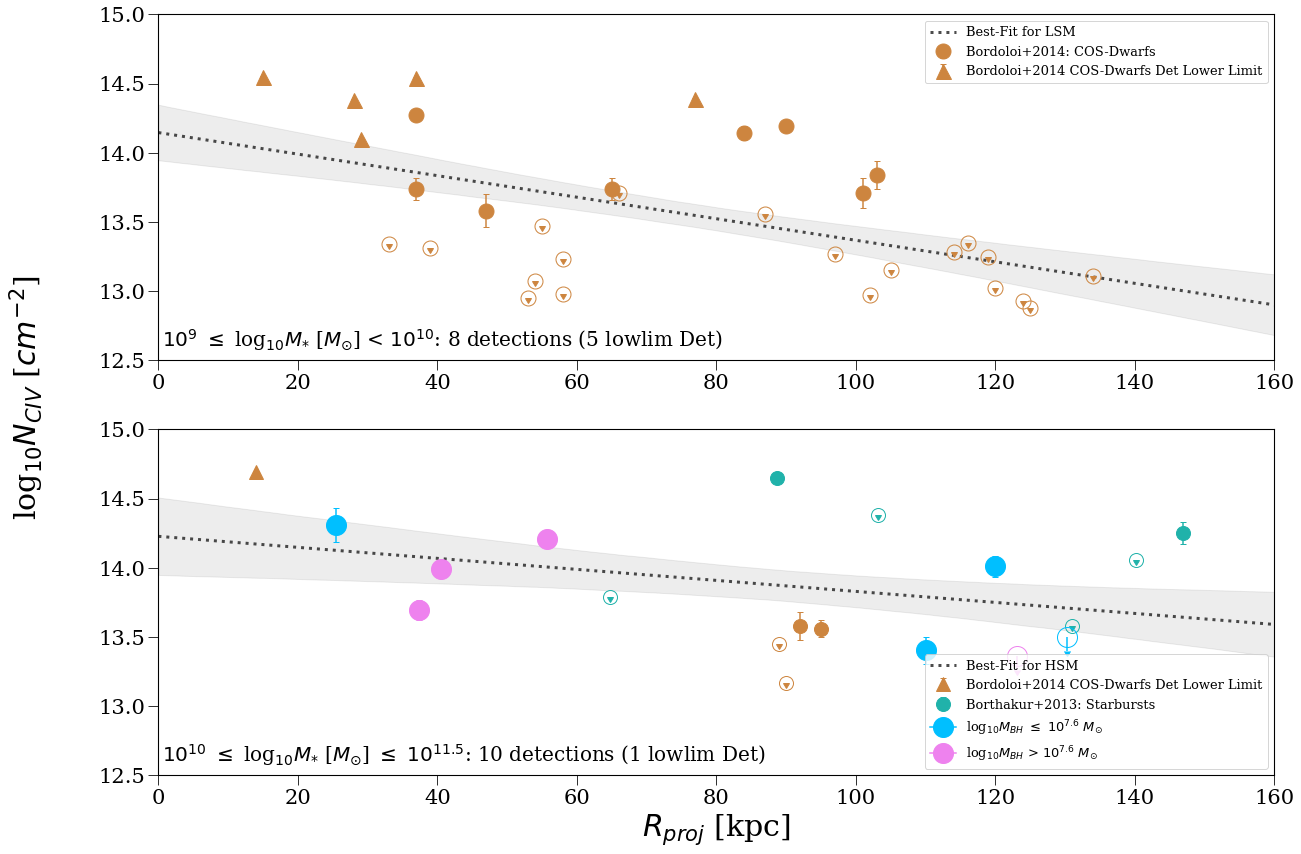

In [21]:
#This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
fig, axs = plt.subplots(2)
#handles, labels = ax.get_legend_handles_labels()
fig.supylabel('log$_{10}N_{CIV}$ [$cm^{-2}$]', fontsize=30)

################ Low Bin Stellar Mass ##############

axs[0].plot(xx, mean_line_lsm, color = 'k', lw = 3, ls = ":", alpha = 0.7, label='Best-Fit for LSM')
axs[0].fill_between(xx, lo_line_lsm, hi_line_lsm, color = "k", alpha = 0.07)

###### Bordoloi ###### 
#Non-Detections 
axs[0].errorbar(bordoloi_low['Rproj'][:19], bordoloi_low['CIVN'][:19], yerr = bordoloi_low['CIVsigN'][:19], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', mfc='none', uplims=True) #upper limit

#Detections
axs[0].errorbar(bordoloi_low['Rproj'][19:27], bordoloi_low['CIVN'][19:27], yerr = bordoloi_low['CIVsigN'][19:27], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', label = 'Bordoloi+2014: COS-Dwarfs') #upper limit
axs[0].errorbar(bordoloi_low['Rproj'][27:], bordoloi_low['CIVN'][27:], yerr = bordoloi_low['CIVsigN'][27:], capsize=3, c = 'peru', 
            marker = '^', markersize = 15, ls='none', lolims=True, label = 'Bordoloi+2014 COS-Dwarfs Det Lower Limit') #lower limit

axs[0].set_ylim(12.5,15)
axs[0].set_xlim(0,160)
#axs[0].set_title('Only using out to $R_{proj}$ $\leq$ 150 kpc', fontsize=30)
axs[0].annotate('$10^{9}$ $\leq$ log$_{10}M_{*}$ [$M_{\odot}$] < $10^{10}$: 8 detections (5 lowlim Det)', (0.5, 12.6), fontsize=20)
axs[0].legend(loc=1)

############### High Bin Stellar Mass ##############

# CIV
axs[1].plot(xx, mean_line_hsm, color = 'k', lw = 3, ls = ":", alpha = 0.7, label='Best-Fit for HSM')
axs[1].fill_between(xx, lo_line_hsm, hi_line_hsm, color = "k", alpha = 0.07)

#####Non-Detections (Upper limit = 1, Lower Limit = 2)
    #Bordoloi
axs[1].errorbar(bordoloi_high['Rproj'][:2], bordoloi_high['CIVN'][:2], yerr = bordoloi_high['CIVsigN'][:2], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none', mfc='none', uplims=True) #upper limit
axs[1].errorbar(bordoloi_high['Rproj'][4:], bordoloi_high['CIVN'][4:], yerr = bordoloi_high['CIVsigN'][4:], capsize=3, c = 'peru', 
            marker = '^', markersize = 14, ls='none', lolims=True, label = 'Bordoloi+2014 COS-Dwarfs Det Lower Limit') #lower limit 
    #Borthakur 
axs[1].errorbar(borthakur_high['Rproj'][:4], borthakur_high['CIVN'][:4], yerr = borthakur_high['CIVsigN'][:4], capsize=3, 
                c = 'lightseagreen', marker = 'o', markersize = 14, ls='none', mfc='none', uplims=True) #upper limit
######Detections
    #Bordoloi (1)
axs[1].errorbar(bordoloi_high['Rproj'][2:4], bordoloi_high['CIVN'][2:4], yerr = bordoloi_high['CIVsigN'][2:4], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none')
    #Borthakur (1)
axs[1].errorbar(borthakur_high['Rproj'][4:], borthakur_high['CIVN'][4:], yerr = borthakur_high['CIVsigN'][4:], capsize=3, 
                c = 'lightseagreen', marker = 'o', markersize = 14, ls='none', label = 'Borthakur+2013: Starbursts') 

#####COS-HOLES DATA#####
#J1159
plt.errorbar(rproj[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now)
plt.errorbar(rproj[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', 
             marker=".", markersize=40, capsize = 3)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

#J1222 - NGC 4248 (3)
axs[1].errorbar (rproj[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

axs[1].set_xlim(0,160)
axs[1].set_ylim(12.5,15)
axs[1].legend(loc=4)
axs[1].annotate('$10^{10}$ $\leq$ log$_{10}M_{*}$ [$M_{\odot}$] $\leq$ $10^{11.5}$: 10 detections (1 lowlim Det)', (0.5, 12.6), fontsize=20)
axs[1].set_xlabel('$R_{proj}$ [kpc]', fontsize=30)
plt.show()

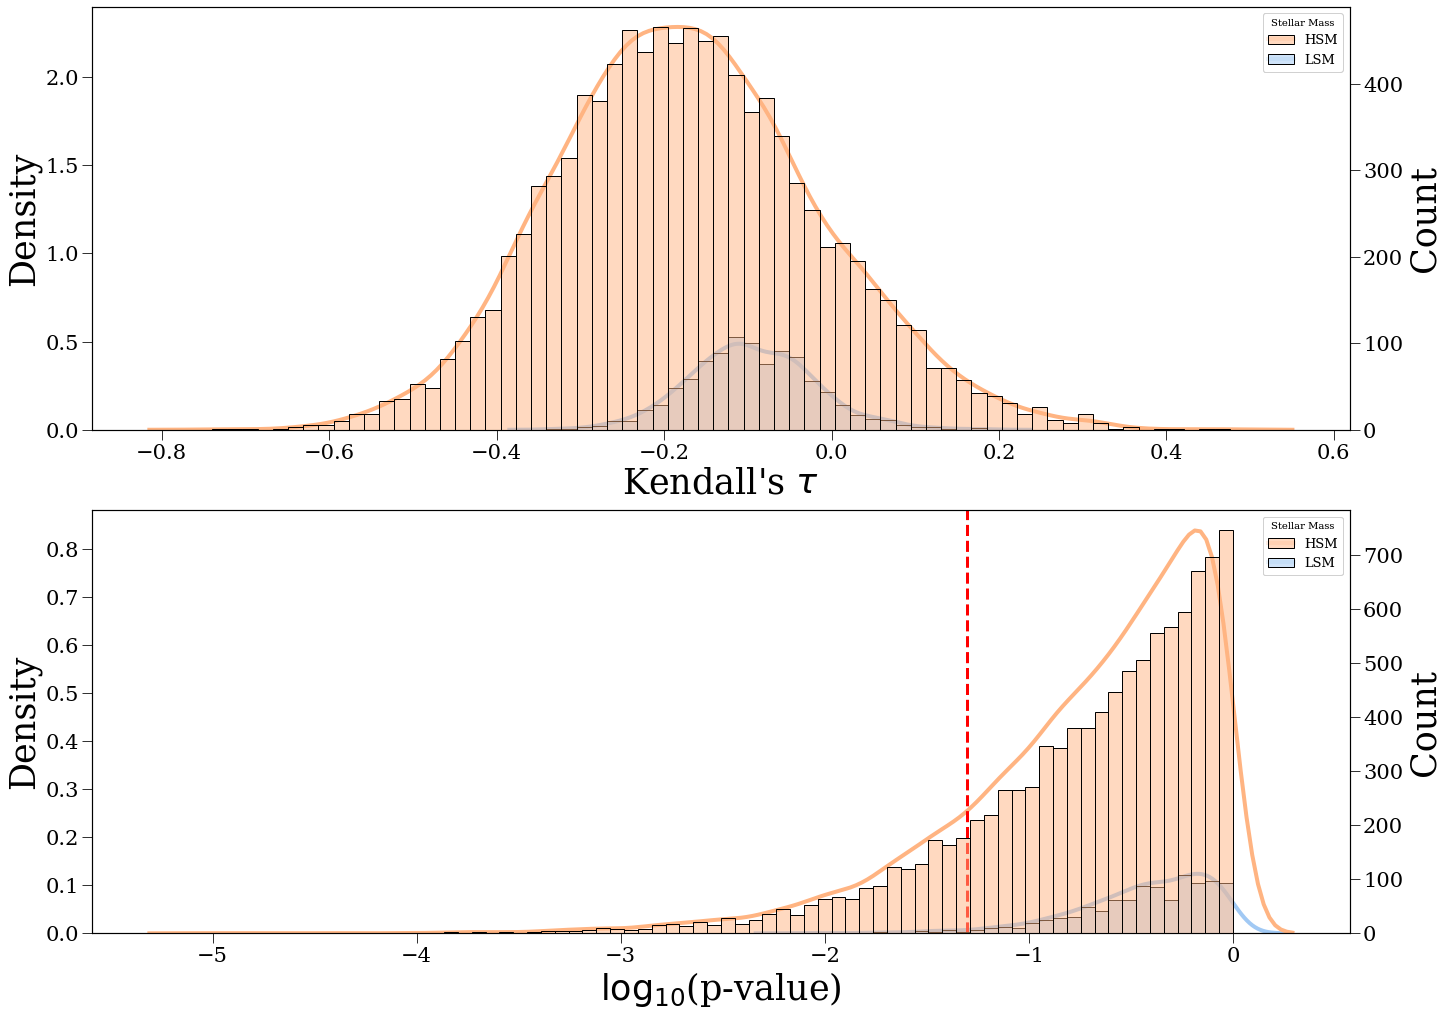

In [22]:
fig,axs = plt.subplots(2,1,constrained_layout = True)

axd = {"B":axs[0], "C":axs[1]}

palette = [pal[1], pal[0]]
sns.kdeplot(data = mc_data, x = r"Kendall's $\tau$", hue = "Stellar Mass", palette = palette, ls = "-", lw = 4, ax = axd["B"])
axt = axd["B"].twinx()
sns.histplot(data = mc_data, x = r"Kendall's $\tau$", hue = "Stellar Mass", palette = palette, legend = True, ax = axt)
#axd["B"].axvline(np.mean(outhsm['coeff_dist']), ls = ":", color = "darkorange", label = "Mean Tau for HSM", lw = 5)
#axd["B"].axvline(np.mean(outlsm['coeff_dist']), ls = ":", color = "royalblue", label = "Mean Tau for LSM", lw = 5)

sns.kdeplot(data = mc_data, x = r"$\log_{10}$(p-value)", hue = "Stellar Mass", palette = palette, legend = True, lw = 4, ls = "-", ax = axd["C"])
axt = axd["C"].twinx()
sns.histplot(data = mc_data, x = r"$\log_{10}$(p-value)", hue = "Stellar Mass", palette = palette, ax = axt)
axd["C"].axvline(np.log10(0.05), ls = "--", color = "r", label = "p = 0.05", lw = 3)
plt.show()

In [23]:
np.sum(outhsm["p-value_dist"]<0.05)/len(outhsm["p-value_dist"])

0.1607

In [24]:
np.sum(outlsm["p-value_dist"]<0.05)/len(outlsm["p-value_dist"])

0.021

In [25]:
np.mean(outhsm['coeff_dist'])

-0.1719713258019344

In [26]:
np.mean(outlsm['coeff_dist'])

nan

In [ ]:
"